In [108]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot

import re
import sklearn
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Get the total data 

In [109]:
df_training_Patient = pd.read_csv('training_SyncPatient.csv')
df_training_Patient.dropna(subset=['PatientGuid'], inplace=True)
# 6600 
df_training_Patient.shape
# select useful data
df_training_Patient = df_training_Patient[["PatientGuid", "DMIndicator"]]
df_training_Patient.head(5)

,PatientGuid,DMIndicator
0,FB6EFC3D-1A20-4497-9CBD-00027CC5D220,0.0
1,C6746626-6783-4650-A58F-00065649139A,0.0
2,E05C6E8F-779F-4594-A388-000C635AE4D3,0.0
3,EAEBD216-F847-4355-87B2-000D942E08F0,0.0
4,C7F10A80-4934-42D2-8540-000FBEBA75C8,0.0


In [110]:
df_test_SyncPatient = pd.read_csv('test_SyncPatient.csv')
# 9948
df_test_SyncPatient.shape
df_test_SyncPatient = df_test_SyncPatient[["PatientGuid", "Gender",'YearOfBirth']]

# Add age into dataframe 
df_test_SyncPatient['Age'] = 2011 - df_test_SyncPatient['YearOfBirth']
df_test_SyncPatient = df_test_SyncPatient[["PatientGuid", "Gender",'Age']]
df_test_SyncPatient.head()

,PatientGuid,Gender,Age
0,FB6EFC3D-1A20-4497-9CBD-00027CC5D220,M,82
1,C6746626-6783-4650-A58F-00065649139A,F,26
2,E05C6E8F-779F-4594-A388-000C635AE4D3,F,27
3,EAEBD216-F847-4355-87B2-000D942E08F0,M,52
4,C7F10A80-4934-42D2-8540-000FBEBA75C8,F,21


In [111]:
# Merge to get the full dataset 
df_total = df_test_SyncPatient.merge(df_training_Patient,how='left', on='PatientGuid')
# 9948
df_total.head(-10)

,PatientGuid,Gender,Age,DMIndicator
0,FB6EFC3D-1A20-4497-9CBD-00027CC5D220,M,82,0.0
1,C6746626-6783-4650-A58F-00065649139A,F,26,0.0
2,E05C6E8F-779F-4594-A388-000C635AE4D3,F,27,0.0
3,EAEBD216-F847-4355-87B2-000D942E08F0,M,52,0.0
4,C7F10A80-4934-42D2-8540-000FBEBA75C8,F,21,0.0
...,...,...,...,...
9933,F49A2CAF-0F0D-4278-805A-FFAE08D0D869,M,64,NaN
9934,6955DF08-BD07-4859-9B89-FFB38801CA38,F,68,NaN
9935,791DDF63-05FB-4000-8BF3-FFB6651C33BA,M,72,NaN
9936,DB8DAE42-229C-4469-AF40-FFB78B5A43B5,M,83,NaN


# Select and process the existing data

## 1. Smoking Status 

In [54]:
df_SmokingStatus = pd.read_csv('SyncSmokingStatus.csv')
df_SmokingStatus = df_SmokingStatus[["Description", "SmokingStatusGuid"]]
df_SmokingStatus.head(10)

,Description,SmokingStatusGuid
0,Current status unknown,E86CA3A8-E35B-4BBF-80E2-0375AB4A1460
1,Not a current tobacco user,1F3BFBBF-AB76-481B-B1E0-08A3689A54BC
2,0 cigarettes per day (previous smoker),C12C2DB7-D31A-4514-88C0-42CBD339F764
3,Few (1-3) cigarettes per day,FA2B7AE4-4D14-4768-A8C7-55B5F0CDF4AF
4,Current status unknown,0815F240-3DD3-43C6-8618-613CA9E41F9F
5,2 or more packs per day,02116D5A-F26C-4A48-9A11-75AC21BC4FD3
6,Up to 1 pack per day,DD01E545-D7AF-4F00-B248-9FD40010D81D
7,1-2 packs per day,FCD437AA-0451-4D8A-9396-B6F19D8B25E8
8,0 cigarettes per day (non-smoker or less than ...,5ABBAB35-836F-4F3E-8632-CE063828DA15
9,Current Tobacco user,2548BD83-03AE-4287-A578-FA170F39E32F


In [55]:
df_PatientSmokingStatus = pd.read_csv('training_SyncPatientSmokingStatus.csv')
# 4940
df_PatientSmokingStatus.shape

non_dplicate_patientSmoking = df_PatientSmokingStatus.drop_duplicates(subset=['PatientGuid','SmokingStatusGuid'])
# 4539
non_dplicate_patientSmoking.shape

group = non_dplicate_patientSmoking.groupby('PatientGuid')
non_dplicate_patientSmoking = group.apply(lambda x: x['SmokingStatusGuid'].unique())
non_dplicate_patientSmoking = non_dplicate_patientSmoking.apply(pd.Series)
# 4427
non_dplicate_patientSmoking.shape
non_dplicate_patientSmoking.head()

non_dplicate_patientSmoking = non_dplicate_patientSmoking.rename(columns={0: 'status_1', 1: 'status_2', 2: 'status_3'})
non_dplicate_patientSmoking.head()
non_dplicate_patientSmoking.reset_index(inplace = True) 
non_dplicate_patientSmoking


,PatientGuid,status_1,status_2,status_3
0,000B4862-7CE7-4EC5-8043-A97FCD74BD78,C12C2DB7-D31A-4514-88C0-42CBD339F764,NaN,NaN
1,0029BBC8-7C22-4444-9F44-87BEF05FE033,C12C2DB7-D31A-4514-88C0-42CBD339F764,NaN,NaN
2,003CEE1F-5BF5-4171-9284-F5464EC12D41,5ABBAB35-836F-4F3E-8632-CE063828DA15,NaN,NaN
3,005F61C9-E537-4AD2-B39C-37F25891F33A,5ABBAB35-836F-4F3E-8632-CE063828DA15,NaN,NaN
4,0063B34F-C2C4-423A-A144-E51F7149253A,1F3BFBBF-AB76-481B-B1E0-08A3689A54BC,NaN,NaN
...,...,...,...,...
4422,FFC8E19F-A199-46A3-895A-E3C07FBAC809,C12C2DB7-D31A-4514-88C0-42CBD339F764,NaN,NaN
4423,FFCCEB55-7FCA-4CCD-A035-9672674F2353,1F3BFBBF-AB76-481B-B1E0-08A3689A54BC,NaN,NaN
4424,FFEF293B-6147-47F0-8F0B-76180C124205,1F3BFBBF-AB76-481B-B1E0-08A3689A54BC,NaN,NaN
4425,FFF2B406-9C3F-4A8B-8B27-7179B7D7FBC6,C12C2DB7-D31A-4514-88C0-42CBD339F764,NaN,NaN


In [56]:
two_status_smoker = non_dplicate_patientSmoking.dropna(thresh=3)
# 107 people have 2 status
two_status_smoker.shape
# 5 people have 3 status
three_status_smoker = non_dplicate_patientSmoking.dropna(thresh=4)
three_status_smoker.head()

,PatientGuid,status_1,status_2,status_3
750,2C40C416-8EF6-437A-9A8A-8D7E267E3F1B,0815F240-3DD3-43C6-8618-613CA9E41F9F,C12C2DB7-D31A-4514-88C0-42CBD339F764,1F3BFBBF-AB76-481B-B1E0-08A3689A54BC
1220,46D73B91-3D8E-47FE-B938-3B77F39AE658,FA2B7AE4-4D14-4768-A8C7-55B5F0CDF4AF,DD01E545-D7AF-4F00-B248-9FD40010D81D,C12C2DB7-D31A-4514-88C0-42CBD339F764
3275,BC4CE087-BAA0-48A7-BA17-51E2844E5AD2,FA2B7AE4-4D14-4768-A8C7-55B5F0CDF4AF,C12C2DB7-D31A-4514-88C0-42CBD339F764,E86CA3A8-E35B-4BBF-80E2-0375AB4A1460
3415,C481C100-2670-4E70-A172-9A4495EE4133,1F3BFBBF-AB76-481B-B1E0-08A3689A54BC,C12C2DB7-D31A-4514-88C0-42CBD339F764,FA2B7AE4-4D14-4768-A8C7-55B5F0CDF4AF
4123,EF7325C2-5C9B-4BE9-81EB-9E0AD16D6AD1,FA2B7AE4-4D14-4768-A8C7-55B5F0CDF4AF,DD01E545-D7AF-4F00-B248-9FD40010D81D,0815F240-3DD3-43C6-8618-613CA9E41F9F


In [57]:
def iloc_iterate(df,col):
    for i in df.index:
        val = df[col].iloc[i]
        if val == 'E86CA3A8-E35B-4BBF-80E2-0375AB4A1460':
            df.at[i,col] = 9
        elif val == '0815F240-3DD3-43C6-8618-613CA9E41F9F':
            df.at[i,col] = 9
        elif val == '1F3BFBBF-AB76-481B-B1E0-08A3689A54BC':
            df.at[i,col] = 0
        elif val == 'C12C2DB7-D31A-4514-88C0-42CBD339F764':
            df.at[i,col] = 1
        elif val == '5ABBAB35-836F-4F3E-8632-CE063828DA15':
            df.at[i,col] = 1
        elif val == 'DD01E545-D7AF-4F00-B248-9FD40010D81D':
            df.at[i,col] = 2
        elif val == 'FA2B7AE4-4D14-4768-A8C7-55B5F0CDF4AF':
            df.at[i,col] = 2
        elif val == 'FCD437AA-0451-4D8A-9396-B6F19D8B25E8':
            df.at[i,col] = 3
        elif val == '02116D5A-F26C-4A48-9A11-75AC21BC4FD3':
            df.at[i,col] = 4
        elif val == '2548BD83-03AE-4287-A578-FA170F39E32F':
            df.at[i,col] = 4
        else:
            df.at[i.col] = 10

In [222]:
#iloc_iterate(non_dplicate_patientSmoking,'status_1')
#iloc_iterate(two_status_smoker,'status_2')
#iloc_iterate(non_dplicate_patientSmoking,'status_3')
non_dplicate_patientSmoking.to_csv('Smokingout.csv', index=False)

In [112]:
df_Patient_New_SmokingStatus = pd.read_csv('Smokingout.csv')
# 4427
df_Patient_New_SmokingStatus.head()

,PatientGuid,status_1
0,000B4862-7CE7-4EC5-8043-A97FCD74BD78,1
1,0029BBC8-7C22-4444-9F44-87BEF05FE033,1
2,003CEE1F-5BF5-4171-9284-F5464EC12D41,1
3,005F61C9-E537-4AD2-B39C-37F25891F33A,1
4,0063B34F-C2C4-423A-A144-E51F7149253A,0


## 2. Transcript

In [113]:
df_Transcript = pd.read_csv("training_SyncTranscript.csv")
# 131031
df_Transcript.shape
# 9948
df_Transcript['PatientGuid'].unique().shape
df_Transcript.head()

,TranscriptGuid,PatientGuid,VisitYear,Height,Weight,BMI,SystolicBP,DiastolicBP,RespiratoryRate,HeartRate,Temperature,PhysicianSpecialty,UserGuid
0,4E74D809-F0C6-4A4D-8F6F-0000042B3AEA,7F78C9FD-8A95-48DC-B074-FA41F5B41826,2009,63.0,145.8,25.824,NaN,NaN,NaN,NaN,NaN,Family Practice,226D906B-E53A-4EEA-86A8-633D14B98BF2
1,84A5F60E-49F6-4437-BAE1-00004F4D15EE,EE1E2D06-8846-4BF5-9C82-E08BC8798DAE,2011,NaN,0.0,0.000,NaN,NaN,NaN,NaN,NaN,Family Practice,412307EE-D407-4F16-8379-D4A88A7B1122
2,7C45CC93-4799-42A1-B6D6-00008D1B3579,1FF23603-B9D4-42B0-B450-BCD5EA46A025,2010,64.5,133.0,22.474,106.0,66.0,NaN,NaN,98.2,Family Practice,B366A9CC-814C-4B2F-99E5-4DC5C79B9DEC
3,375F3C1C-0058-4872-B96E-00009FE9328A,16C2D99F-1494-4DF9-82E6-0FA0F0EB1B63,2011,68.0,125.4,19.065,119.0,64.0,NaN,NaN,98.2,Family Practice,B8CDE35A-5C03-4995-B771-10F660B84F1A
4,66439EEB-2FFB-4711-87F2-0001690835A6,18256C20-BAC8-4F57-A03C-2C7152CE1813,2011,NaN,0.0,0.000,NaN,NaN,NaN,NaN,NaN,Family Practice,6D105E1E-EACC-478E-9454-FBED1F50F888


### 2.1 Height 

In [114]:
df_height = df_Transcript[["PatientGuid", "Height"]]

df_height.head()

group = df_height.groupby('PatientGuid')
non_dplicate_height = group.apply(lambda x: x['Height'].unique())
non_dplicate_height = non_dplicate_height.apply(pd.Series)
non_dplicate_height.shape

(9948, 17)

In [115]:
# Average Height
non_dplicate_height.replace(0, np.nan, inplace=True)
non_dplicate_height['average_height'] = non_dplicate_height.mean(numeric_only=True, axis=1)
non_dplicate_height.reset_index(inplace = True) 
non_dplicate_height = non_dplicate_height[["PatientGuid","average_height"]]
non_dplicate_height.shape
non_dplicate_height.head()

,PatientGuid,average_height
0,00023761-9D8D-445B-874C-2424CC7CF620,67.50
1,0005D9BD-0247-4F02-B7EE-7C1B44825FA1,66.00
2,000B4862-7CE7-4EC5-8043-A97FCD74BD78,65.00
3,00110ABC-DAB9-49E3-A1C8-88BBF8D58109,71.25
4,002667F4-B9A3-4DE2-875F-8034DD637865,59.00


### 2.2 Weight

In [116]:
df_weight = df_Transcript[["PatientGuid", "Weight"]]

df_weight.head()

group = df_weight.groupby('PatientGuid')
non_dplicate_weight = group.apply(lambda x: x['Weight'].unique())
non_dplicate_weight = non_dplicate_weight.apply(pd.Series)
non_dplicate_weight.shape

(9948, 85)

In [117]:
# replace anomalies with 0
def replace_weight(df):
    for x in range(len(df.columns)):
        df[x] = np.where(df[x] > 300, 0, df[x])
replace_weight(non_dplicate_weight)

In [118]:
# Average Weight
non_dplicate_weight.replace(0, np.nan, inplace=True)
non_dplicate_weight['average_weight'] = non_dplicate_weight.mean(numeric_only=True, axis=1)
non_dplicate_weight.reset_index(inplace = True) 
non_dplicate_weight = non_dplicate_weight[["PatientGuid","average_weight"]]
non_dplicate_weight.shape
non_dplicate_weight.head()

,PatientGuid,average_weight
0,00023761-9D8D-445B-874C-2424CC7CF620,183.666667
1,0005D9BD-0247-4F02-B7EE-7C1B44825FA1,136.000000
2,000B4862-7CE7-4EC5-8043-A97FCD74BD78,100.045000
3,00110ABC-DAB9-49E3-A1C8-88BBF8D58109,210.000000
4,002667F4-B9A3-4DE2-875F-8034DD637865,102.200000


### 2.3 BMI

In [119]:
df_BMI = df_Transcript[["PatientGuid", "BMI"]]

df_BMI.head()

group = df_BMI.groupby('PatientGuid')
non_dplicate_BMI = group.apply(lambda x: x['BMI'].unique())
non_dplicate_BMI = non_dplicate_BMI.apply(pd.Series)
non_dplicate_BMI.shape
# weired dataset 
non_dplicate_BMI.nlargest(30,0)

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
PatientGuid,,,,,,,,,,,,,,,,,,,,,
F9EE4F86-94EC-423F-84D6-4D39C0244227,5811.034,30.416,30.551,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EF8D37AB-55CE-4841-9814-8D21E33DF206,5595.880,0.000,37.125,36.759,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FB23E995-70FD-421A-B6BA-8C3586E589F6,4685.320,33.961,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
018FA5FE-6EC4-4D34-BE70-41814D4149FA,3671.868,34.326,0.000,34.669,4578.215,35.013,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
498421C5-3895-47FC-9312-0EF9B85ED820,575.182,78.111,43.938,0.000,20.068,40.306,24.019,31.955,28.120,23.734,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CDDA9B54-D578-4A83-B777-9B6816C0EE91,499.430,35.479,36.576,34.748,0.000,36.942,33.943,50.437,33.285,35.662,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1C9EB744-F148-447B-881B-B4FCCBA73738,250.863,17.887,17.471,0.000,19.052,17.637,18.635,17.975,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F034F5E4-AC1A-4546-88F2-A797597DD2E2,134.790,31.351,31.174,30.819,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77D719CC-C139-411D-A575-2860A1C01BEF,65.806,30.035,427.204,30.894,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [120]:
def replace_BMI(df):
    for x in range(len(df.columns)):
        df[x] = np.where(df[x] > 65, 0, df[x])
replace_BMI(non_dplicate_BMI)
non_dplicate_BMI.nlargest(30,0)

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
PatientGuid,,,,,,,,,,,,,,,,,,,,,
A6468F7F-417A-4261-AC6D-D64F8E2228A9,63.127,0.000,18.221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CAC265C1-72E0-4550-B189-314185BE00B5,57.791,55.262,56.679,50.303,0.000,49.594,42.155,54.235,57.059,51.011,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5883AF5C-513F-4F2A-B204-762AAF6963E6,55.971,57.919,0.000,58.096,61.284,41.270,57.388,60.576,57.565,56.325,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F42C51F9-4935-4E16-B3F2-86C7CF9BE372,55.216,24.372,25.401,24.886,25.058,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C97811F5-6E1B-454D-A365-B87A6A5F5013,54.743,0.000,54.094,51.498,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15D170D8-C4AF-4273-B61A-D1997F22676E,54.499,0.000,42.977,54.316,47.367,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
E9144A10-B708-4574-A30E-696C4E87A5D8,53.744,52.746,0.000,40.932,49.252,45.591,54.243,52.247,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A53C6FBB-730C-4F4C-A128-6B5F3120BCE1,53.159,38.243,34.119,51.938,48.366,47.617,38.618,49.116,47.492,33.994,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7E3B9F76-C55F-46B9-897D-E5C4DB645CF0,53.097,50.581,41.595,0.000,52.963,49.904,41.729,41.996,39.187,50.324,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [121]:
# Average BMI
non_dplicate_BMI.replace(0, np.nan, inplace=True)
non_dplicate_BMI['average_BMI'] = non_dplicate_BMI.mean(numeric_only=True, axis=1)
non_dplicate_BMI.reset_index(inplace = True) 
non_dplicate_BMI = non_dplicate_BMI[["PatientGuid","average_BMI"]]
non_dplicate_BMI.shape
non_dplicate_BMI.head()

,PatientGuid,average_BMI
0,00023761-9D8D-445B-874C-2424CC7CF620,28.485667
1,0005D9BD-0247-4F02-B7EE-7C1B44825FA1,22.133667
2,000B4862-7CE7-4EC5-8043-A97FCD74BD78,16.646500
3,00110ABC-DAB9-49E3-A1C8-88BBF8D58109,29.086500
4,002667F4-B9A3-4DE2-875F-8034DD637865,20.639600


### 2.4 SystolicBP

In [122]:
df_SystolicBP = df_Transcript[["PatientGuid", "SystolicBP"]]

df_SystolicBP.head()

group = df_SystolicBP.groupby('PatientGuid')
non_dplicate_SystolicBP = group.apply(lambda x: x['SystolicBP'].unique())
non_dplicate_SystolicBP = non_dplicate_SystolicBP.apply(pd.Series)
non_dplicate_SystolicBP.shape

(9948, 52)

In [123]:
# Average SystolicBP
non_dplicate_SystolicBP.replace(0, np.nan, inplace=True)
non_dplicate_SystolicBP['average_SystolicBP'] = non_dplicate_SystolicBP.mean(numeric_only=True, axis=1)
non_dplicate_SystolicBP.reset_index(inplace = True) 
non_dplicate_SystolicBP = non_dplicate_SystolicBP[["PatientGuid","average_SystolicBP"]]
non_dplicate_SystolicBP.shape
non_dplicate_SystolicBP.head()

,PatientGuid,average_SystolicBP
0,00023761-9D8D-445B-874C-2424CC7CF620,125.333333
1,0005D9BD-0247-4F02-B7EE-7C1B44825FA1,134.714286
2,000B4862-7CE7-4EC5-8043-A97FCD74BD78,94.200000
3,00110ABC-DAB9-49E3-A1C8-88BBF8D58109,127.500000
4,002667F4-B9A3-4DE2-875F-8034DD637865,130.500000


### 2.5 DiastolicBP

In [124]:
df_DiastolicBP = df_Transcript[["PatientGuid", "DiastolicBP"]]

df_DiastolicBP.head()

group = df_DiastolicBP.groupby('PatientGuid')
non_dplicate_DiastolicBP = group.apply(lambda x: x['DiastolicBP'].unique())
non_dplicate_DiastolicBP = non_dplicate_DiastolicBP.apply(pd.Series)
non_dplicate_DiastolicBP.shape

(9948, 43)

In [125]:
# Average DiastolicBP
non_dplicate_DiastolicBP.replace(0, np.nan, inplace=True)
non_dplicate_DiastolicBP['average_DiastolicBP'] = non_dplicate_DiastolicBP.mean(numeric_only=True, axis=1)
non_dplicate_DiastolicBP.reset_index(inplace = True) 
non_dplicate_DiastolicBP = non_dplicate_DiastolicBP[["PatientGuid","average_DiastolicBP"]]
non_dplicate_DiastolicBP.shape
non_dplicate_DiastolicBP.head()

,PatientGuid,average_DiastolicBP
0,00023761-9D8D-445B-874C-2424CC7CF620,74.666667
1,0005D9BD-0247-4F02-B7EE-7C1B44825FA1,73.500000
2,000B4862-7CE7-4EC5-8043-A97FCD74BD78,59.500000
3,00110ABC-DAB9-49E3-A1C8-88BBF8D58109,77.500000
4,002667F4-B9A3-4DE2-875F-8034DD637865,80.400000


### 2.6 RespiratoryRate

In [126]:
df_RespiratoryRate = df_Transcript[["PatientGuid", "RespiratoryRate"]]

df_RespiratoryRate.head()

group = df_RespiratoryRate.groupby('PatientGuid')
non_dplicate_RespiratoryRate = group.apply(lambda x: x['RespiratoryRate'].unique())
non_dplicate_RespiratoryRate = non_dplicate_RespiratoryRate.apply(pd.Series)
# 2892 nan
non_dplicate_RespiratoryRate.shape

(9948, 13)

In [127]:
def replace_RespiratoryRate(df):
    for x in range(len(df.columns)):
        df[x] = np.where(df[x] > 35, 0, df[x])
        df[x] = np.where(df[x] < 10, 0, df[x])
replace_RespiratoryRate(non_dplicate_RespiratoryRate)

In [128]:
# Average RespiratoryRate
non_dplicate_RespiratoryRate.replace(0, np.nan, inplace=True)
non_dplicate_RespiratoryRate['average_RespiratoryRate'] = non_dplicate_RespiratoryRate.mean(numeric_only=True, axis=1)
non_dplicate_RespiratoryRate.reset_index(inplace = True) 
non_dplicate_RespiratoryRate = non_dplicate_RespiratoryRate[["PatientGuid","average_RespiratoryRate"]]
non_dplicate_RespiratoryRate.shape
non_dplicate_RespiratoryRate.head()

,PatientGuid,average_RespiratoryRate
0,00023761-9D8D-445B-874C-2424CC7CF620,16.000000
1,0005D9BD-0247-4F02-B7EE-7C1B44825FA1,15.000000
2,000B4862-7CE7-4EC5-8043-A97FCD74BD78,17.333333
3,00110ABC-DAB9-49E3-A1C8-88BBF8D58109,12.000000
4,002667F4-B9A3-4DE2-875F-8034DD637865,19.000000


### Concat Transcript Data to form a new version 

In [129]:
df_final_Transcript = pd.concat([df_training_Patient, df_Transcript], axis=1, join='inner')

In [130]:
df_final_Transcript = non_dplicate_BMI.merge(non_dplicate_SystolicBP, how='left', on='PatientGuid')
df_final_Transcript = df_final_Transcript.merge(non_dplicate_DiastolicBP, how='left', on='PatientGuid')
df_final_Transcript = df_final_Transcript.merge(non_dplicate_RespiratoryRate, how='left', on='PatientGuid')
df_final_Transcript = df_final_Transcript.merge(non_dplicate_height, how='left', on='PatientGuid')
df_final_Transcript = df_final_Transcript.merge(non_dplicate_weight, how='left', on='PatientGuid')

df_final_Transcript.head()
df_final_Transcript.shape

(9948, 7)

## 3. Diagnosis

In [131]:
df_Diagnosis = pd.read_csv("training_SyncDiagnosis.csv")
# 94830
df_Diagnosis.shape
# 9948
df_Diagnosis['PatientGuid'].unique().shape

df_Diagnosis = df_Diagnosis[["PatientGuid", "ICD9Code"]]
df_Diagnosis.head()

,PatientGuid,ICD9Code
0,BA954BD7-5EE7-4CCF-AB31-07B9C7F72D07,825.0
1,F8D890EA-7920-40AF-BFCF-42010E1BF563,784.0
2,A3AD2D57-5589-47E2-BDB2-1D5B51764896,461.9
3,2AC1DCDA-9C11-44ED-A2BE-4B1F2393B68E,V72.31
4,9DB2B66C-A696-4308-BFA1-4C8F6E97977E,345.90


In [132]:
code = ["250", "250.0", "250.00", "250.10", "250.20", "250.30", "250.40", "250.50", "250.60", "250.70", 
        "250.80", "250.90", "250.02", "250.12", "250.22", "250.32", "250.42", "250.52", "250.62", 
        "250.72", "250.82", "250.92", 
        "250.1", "250.4", "250.5", "250.6", "250.7", "250.9"]
relate_code = ["783.1", "783.21", "701.2", "701.3", "251.1", "401.9", "272.1", "272.0", 
               "272.2", "272.4", "536.3", "337.1", "357.2", "366.41", "583.81", "251.2", "788.42", "783.5", 
               "791.5", "256.4", "626.4", "277.7", "571.8", "362.0", "790.2", 'V58.67', 'V77.91']

# 0
direct_Diabete = df_Diagnosis[df_Diagnosis.ICD9Code.isin(code)]
direct_Diabete['Diabete_idx'] = 3

# 7340
indirect_Diabete = df_Diagnosis[df_Diagnosis.ICD9Code.isin(relate_code)]
indirect_Diabete['Diabete_idx'] = 2
# 87490
no_Diabete = df_Diagnosis[~df_Diagnosis.ICD9Code.isin(code) & ~df_Diagnosis.ICD9Code.isin(relate_code)]
no_Diabete['Diabete_idx'] = 0

frames = [direct_Diabete, indirect_Diabete, no_Diabete]
df_final_Diabete = pd.concat(frames)
df_final_Diabete = df_final_Diabete[["PatientGuid", "Diabete_idx"]]
df_final_Diabete.head()

,PatientGuid,Diabete_idx
5,89B52928-EEED-4C1C-B4D5-0B9BA63A78F0,2
31,8A5705B5-AB11-493B-9D55-231EBA2FD21E,2
38,9C52601E-5670-41DD-BC96-6D652CD1792C,2
47,F20BDA23-615E-4EA5-AFD1-339719131168,2
54,1F24803C-E047-492A-82AD-7AAE5880E43F,2


In [133]:
group = df_final_Diabete.groupby('PatientGuid')

non_dplicate_Diabete = group.apply(lambda x: x['Diabete_idx'].unique())
non_dplicate_Diabete = non_dplicate_Diabete.apply(pd.Series)
non_dplicate_Diabete = non_dplicate_Diabete.rename(columns={0: 'Diabete_idx', 1: 'non_important'})

non_dplicate_Diabete.reset_index(inplace = True)
non_dplicate_Diabete["Diabete_idx"] = non_dplicate_Diabete["Diabete_idx"].apply(pd.to_numeric)
non_dplicate_Diabete = non_dplicate_Diabete[["PatientGuid", "Diabete_idx"]]
non_dplicate_Diabete.head()
non_dplicate_Diabete.shape

(9948, 2)

## Final Total Data

In [134]:
df = df_total.merge(df_final_Transcript,how='left', on='PatientGuid')
df = df.merge(df_Patient_New_SmokingStatus,how='left', on='PatientGuid')
df = df.merge(non_dplicate_Diabete,how='left', on='PatientGuid')
# refine the order of predictor 
df = df[['PatientGuid', 'Gender', 'Age', 'average_BMI', 'average_SystolicBP','average_DiastolicBP','average_RespiratoryRate','average_height','average_weight','status_1','Diabete_idx','DMIndicator']]
df.head()
#df.shape

,PatientGuid,Gender,Age,average_BMI,average_SystolicBP,average_DiastolicBP,average_RespiratoryRate,average_height,average_weight,status_1,Diabete_idx,DMIndicator
0,FB6EFC3D-1A20-4497-9CBD-00027CC5D220,M,82,19.121500,132.333333,72.714286,NaN,69.0,133.400000,NaN,2.0,0.0
1,C6746626-6783-4650-A58F-00065649139A,F,26,26.389000,108.333333,67.000000,NaN,66.5,164.293714,1.0,0.0,0.0
2,E05C6E8F-779F-4594-A388-000C635AE4D3,F,27,38.041000,122.666667,88.000000,NaN,59.0,194.666667,NaN,0.0,0.0
3,EAEBD216-F847-4355-87B2-000D942E08F0,M,52,32.885300,125.000000,82.500000,15.333333,72.0,242.500000,3.0,2.0,0.0
4,C7F10A80-4934-42D2-8540-000FBEBA75C8,F,21,32.810615,114.500000,76.500000,19.000000,62.0,178.814286,NaN,0.0,0.0


In [135]:
data = df.copy()
data = data[['Gender', 'Age', 'average_BMI', 'average_SystolicBP','average_DiastolicBP','average_RespiratoryRate','average_height','average_weight','status_1','Diabete_idx','DMIndicator']]

In [136]:
patientID = df[['PatientGuid']]
test_patientID = patientID.iloc[-3348:]
test_patientID

,PatientGuid
6600,027AC271-0852-4DDD-99C2-A74FE50066E0
6601,C5D4C6FA-A2B3-4CCD-A8D5-A760127CE47D
6602,1F4D1486-7632-4576-AC92-A760680D1DC9
6603,0F6AD971-F133-4BD7-B508-A76788D9C46C
6604,1E23496C-7AAF-4A91-AAF4-A769BD439E67
...,...
9943,96C0A4E6-1E3E-497E-9C4E-FFEC0E25AD3A
9944,5845977A-3014-4301-92B3-FFF0A2EBBAD2
9945,F948403A-ABE6-496D-B37D-FFF9A9D79767
9946,F764BC86-0CFA-4661-8D84-FFFA8E2B6080


In [137]:
# Age_Group 
category = pd.cut(data.Age,bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, np.inf],
                  labels=['<=10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90'])
data.insert(2,'Age_Group',category)
data.drop(columns=['Age'], inplace=True)
data.head()

,Gender,Age_Group,average_BMI,average_SystolicBP,average_DiastolicBP,average_RespiratoryRate,average_height,average_weight,status_1,Diabete_idx,DMIndicator
0,M,81-90,19.121500,132.333333,72.714286,NaN,69.0,133.400000,NaN,2.0,0.0
1,F,21-30,26.389000,108.333333,67.000000,NaN,66.5,164.293714,1.0,0.0,0.0
2,F,21-30,38.041000,122.666667,88.000000,NaN,59.0,194.666667,NaN,0.0,0.0
3,M,51-60,32.885300,125.000000,82.500000,15.333333,72.0,242.500000,3.0,2.0,0.0
4,F,21-30,32.810615,114.500000,76.500000,19.000000,62.0,178.814286,NaN,0.0,0.0


In [138]:
# Fillna
data['average_BMI'].fillna((data['average_BMI'].mean()), inplace=True)
data['average_SystolicBP'].fillna((data['average_SystolicBP'].mean()), inplace=True)
data['average_DiastolicBP'].fillna((data['average_DiastolicBP'].mean()), inplace=True)
data['average_RespiratoryRate'].fillna((data['average_RespiratoryRate'].mean()), inplace=True)
data['average_height'].fillna((data['average_height'].mean()), inplace=True)
data['average_weight'].fillna((data['average_weight'].mean()), inplace=True)
data['status_1'].fillna((data['status_1'].mean()), inplace=True)

In [139]:
data.dtypes

Gender                       object
Age_Group                  category
average_BMI                 float64
average_SystolicBP          float64
average_DiastolicBP         float64
average_RespiratoryRate     float64
average_height              float64
average_weight              float64
status_1                    float64
Diabete_idx                 float64
DMIndicator                 float64
dtype: object

In [140]:
data["status_1"] = data["status_1"].astype(object)
data["Age_Group"] = data["Age_Group"].astype(object)
data["Diabete_idx"] = data["Diabete_idx"].astype(object)
data.dtypes

Gender                      object
Age_Group                   object
average_BMI                float64
average_SystolicBP         float64
average_DiastolicBP        float64
average_RespiratoryRate    float64
average_height             float64
average_weight             float64
status_1                    object
Diabete_idx                 object
DMIndicator                float64
dtype: object

In [141]:
# to dummy
data = pd.get_dummies(data)
data

,average_BMI,average_SystolicBP,average_DiastolicBP,average_RespiratoryRate,average_height,average_weight,DMIndicator,Gender_F,Gender_M,Age_Group_11-20,...,Age_Group_81-90,status_1_0.0,status_1_1.0,status_1_1.0099390106166704,status_1_2.0,status_1_3.0,status_1_4.0,status_1_9.0,Diabete_idx_0.0,Diabete_idx_2.0
0,19.121500,132.333333,72.714286,16.622982,69.000000,133.400000,0.0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
1,26.389000,108.333333,67.000000,16.622982,66.500000,164.293714,0.0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
2,38.041000,122.666667,88.000000,16.622982,59.000000,194.666667,0.0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,32.885300,125.000000,82.500000,15.333333,72.000000,242.500000,0.0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
4,32.810615,114.500000,76.500000,19.000000,62.000000,178.814286,0.0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9943,25.303000,124.666667,76.800000,16.000000,64.250000,148.083333,NaN,1,0,0,...,0,0,1,0,0,0,0,0,1,0
9944,22.503000,106.666667,71.000000,14.000000,58.300000,108.733333,NaN,1,0,0,...,0,0,0,1,0,0,0,0,0,1
9945,30.318667,128.600000,76.500000,16.622982,66.750000,195.100000,NaN,1,0,0,...,0,0,0,1,0,0,0,0,1,0
9946,35.652714,119.100000,76.666667,18.000000,62.583333,201.571429,NaN,1,0,0,...,0,0,1,0,0,0,0,0,0,1


In [142]:
# change the order of the data 
cols = list(data.columns.values) 
cols.pop(cols.index('DMIndicator')) 
data = data[cols+['DMIndicator']] 
data

,average_BMI,average_SystolicBP,average_DiastolicBP,average_RespiratoryRate,average_height,average_weight,Gender_F,Gender_M,Age_Group_11-20,Age_Group_21-30,...,status_1_0.0,status_1_1.0,status_1_1.0099390106166704,status_1_2.0,status_1_3.0,status_1_4.0,status_1_9.0,Diabete_idx_0.0,Diabete_idx_2.0,DMIndicator
0,19.121500,132.333333,72.714286,16.622982,69.000000,133.400000,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0.0
1,26.389000,108.333333,67.000000,16.622982,66.500000,164.293714,1,0,0,1,...,0,1,0,0,0,0,0,1,0,0.0
2,38.041000,122.666667,88.000000,16.622982,59.000000,194.666667,1,0,0,1,...,0,0,1,0,0,0,0,1,0,0.0
3,32.885300,125.000000,82.500000,15.333333,72.000000,242.500000,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0.0
4,32.810615,114.500000,76.500000,19.000000,62.000000,178.814286,1,0,0,1,...,0,0,1,0,0,0,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9943,25.303000,124.666667,76.800000,16.000000,64.250000,148.083333,1,0,0,0,...,0,1,0,0,0,0,0,1,0,NaN
9944,22.503000,106.666667,71.000000,14.000000,58.300000,108.733333,1,0,0,1,...,0,0,1,0,0,0,0,0,1,NaN
9945,30.318667,128.600000,76.500000,16.622982,66.750000,195.100000,1,0,0,0,...,0,0,1,0,0,0,0,1,0,NaN
9946,35.652714,119.100000,76.666667,18.000000,62.583333,201.571429,1,0,0,0,...,0,1,0,0,0,0,0,0,1,NaN


# Visualization 

In [913]:
from IPython.display import Image
from IPython.core.display import HTML 
from IPython.display import display
PATH = "/Users/nimo/Desktop/Health/1/datasetPracticeFusionDiabetes/IMG"

In [918]:
Age_img = Image(filename = PATH + "/Age.png", width=400, height=400)
Gender_img = Image(filename = PATH + "/Gender.png", width=400, height=400)
BMI_img = Image(filename = PATH + "/BMI.png", width=400, height=400)
Weight_img = Image(filename = PATH + "/Weight.png", width=400, height=400)
Height_img = Image(filename = PATH + "/Height.png", width=400, height=400)
DiastolicBP_img = Image(filename = PATH + "/DiastolicBP.png", width=400, height=400)
SystolicBP_img = Image(filename = PATH + "/SystolicBP.png", width=400, height=400)
RespiratoryRate_img = Image(filename = PATH + "/RespiratoryRate.png", width=400, height=400)
DiabeteRisk_img = Image(filename = PATH + "/DiabeteRisk.png", width=400, height=400)
SmokingStatus_img = Image(filename = PATH + "/SmokingStatus.png", width=400, height=400)
DMIndicator_img = Image(filename = PATH + "/DMIndicator.png", width=400, height=400)

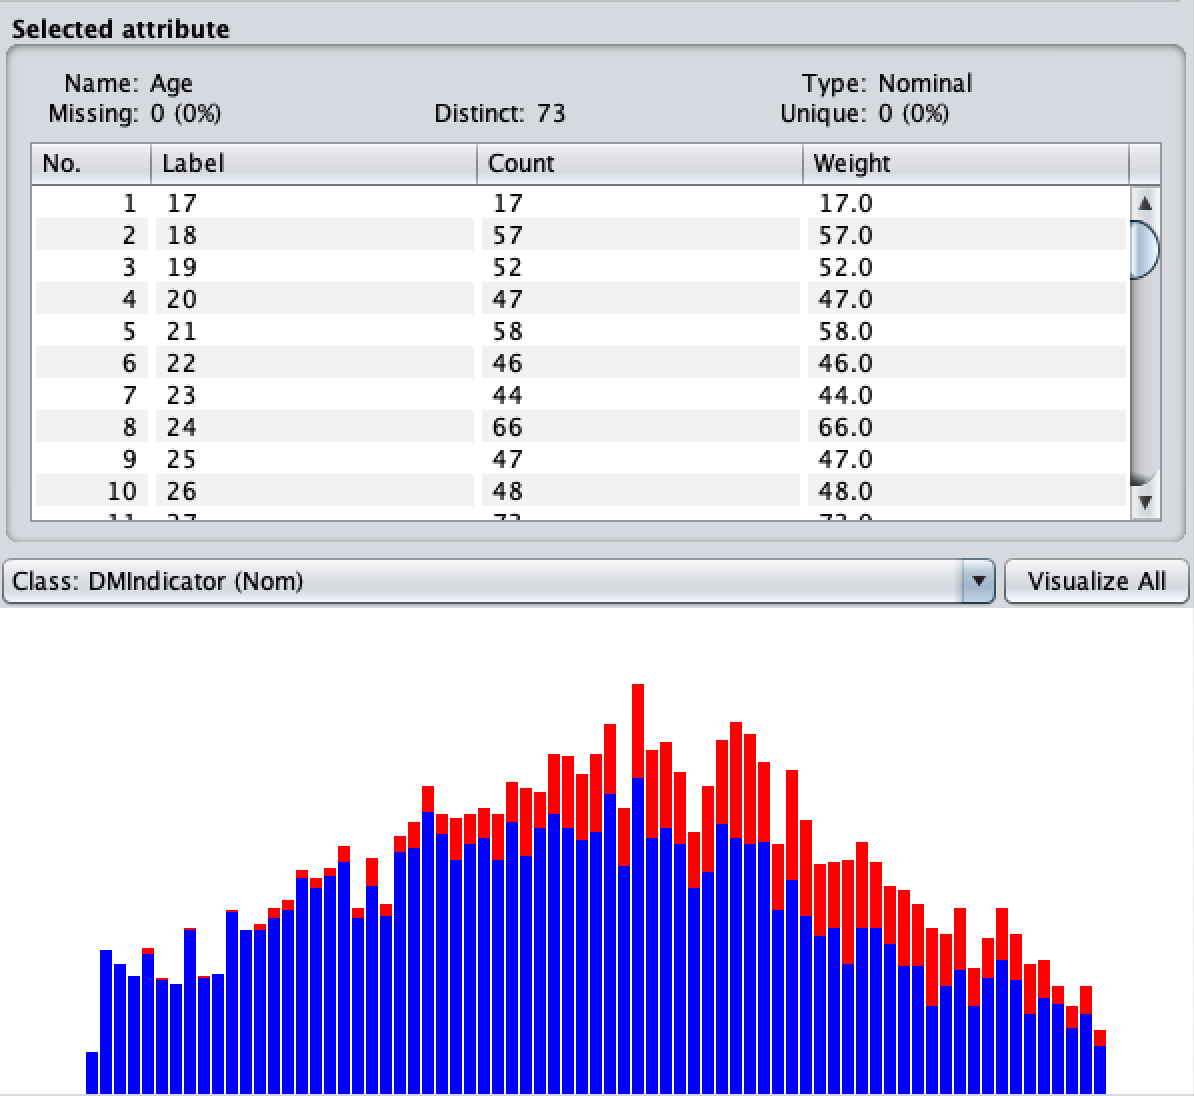

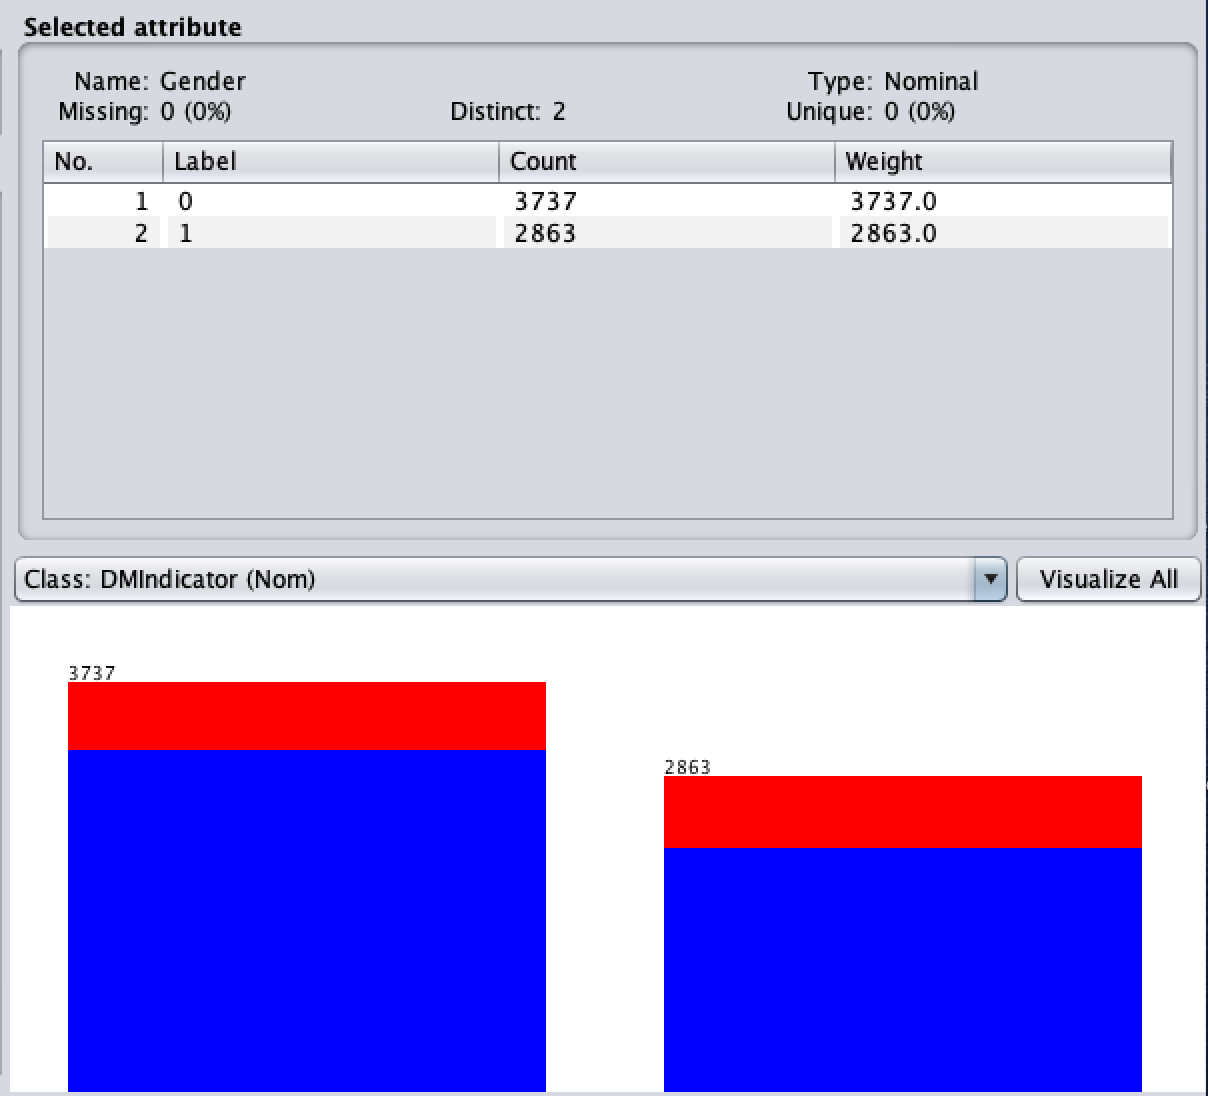

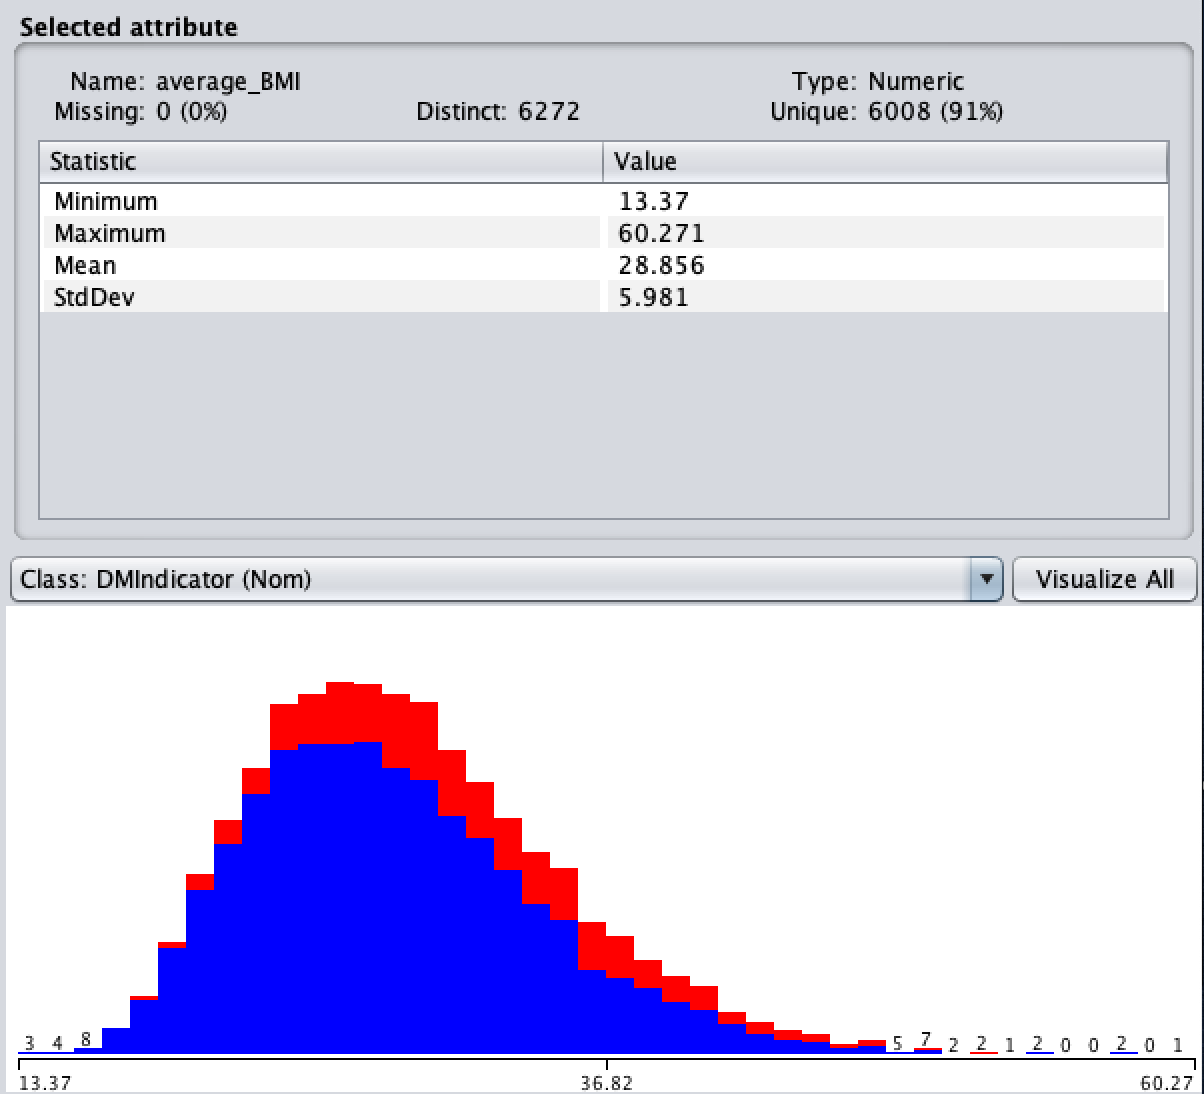

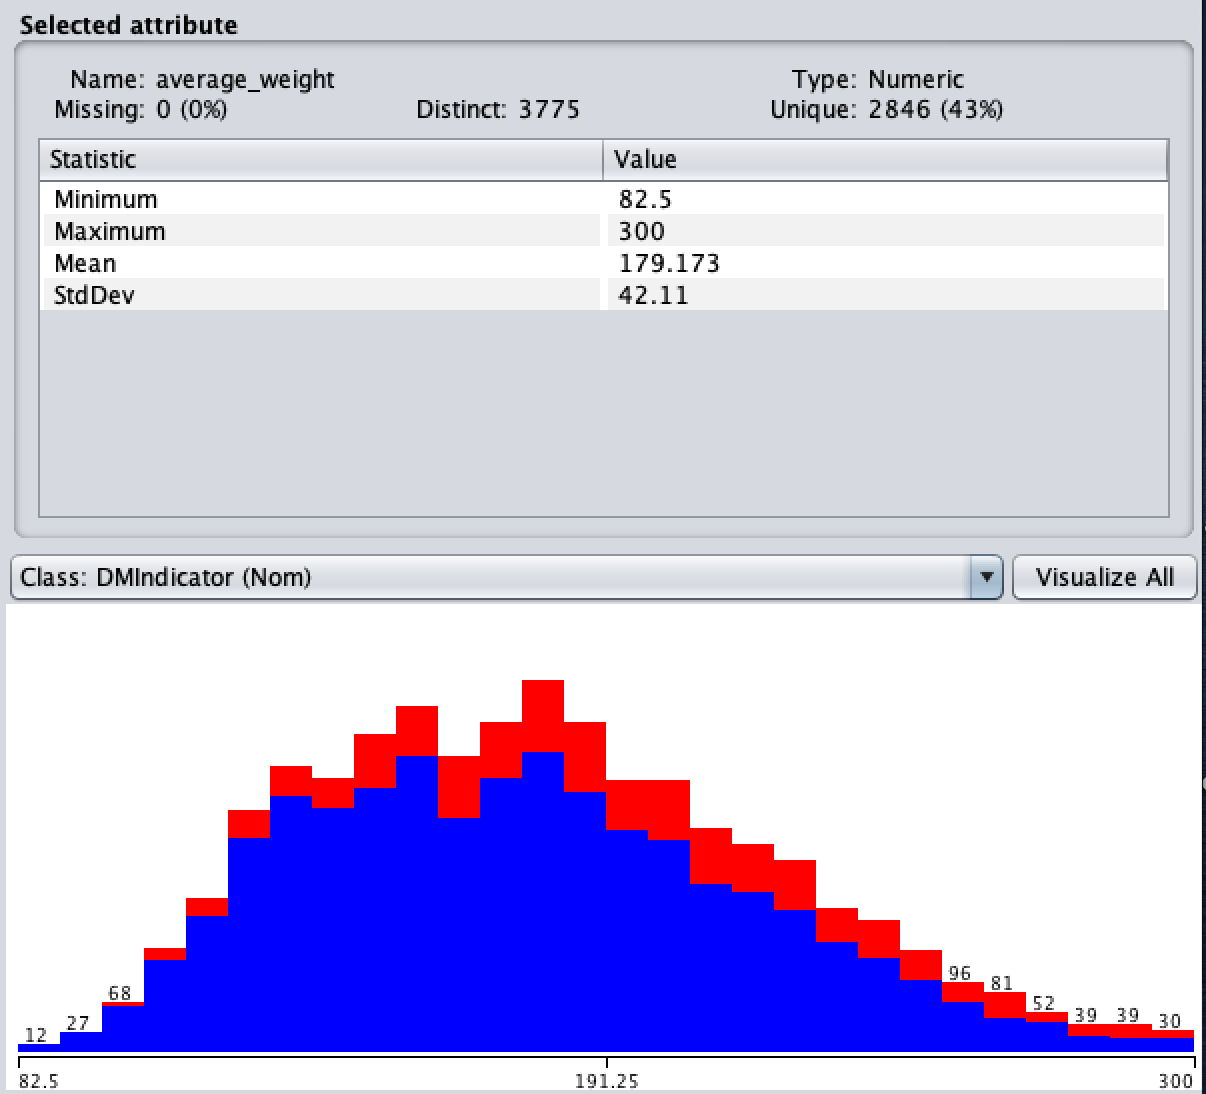

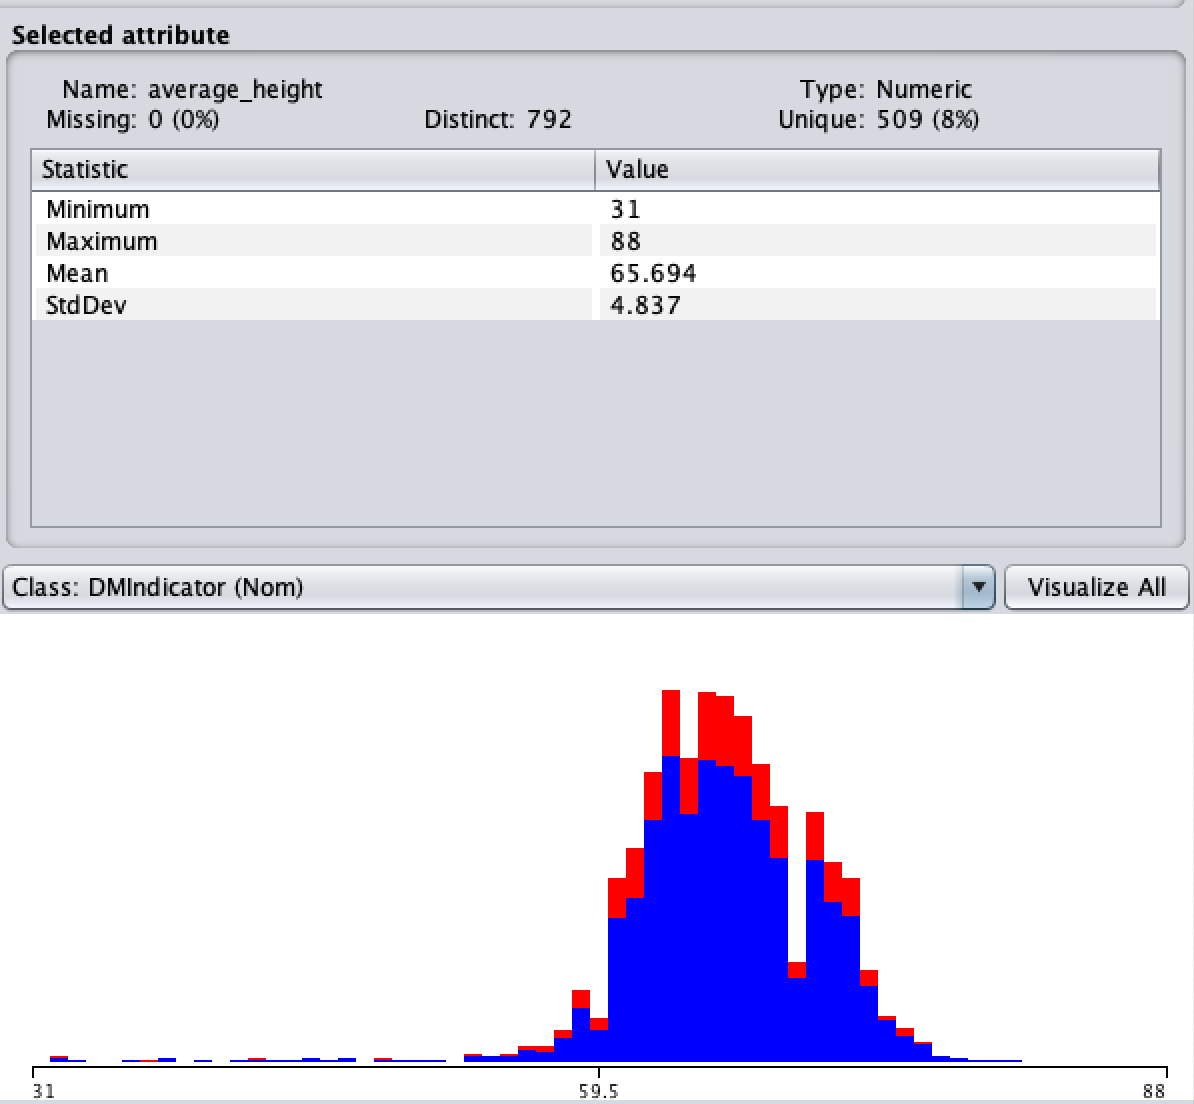

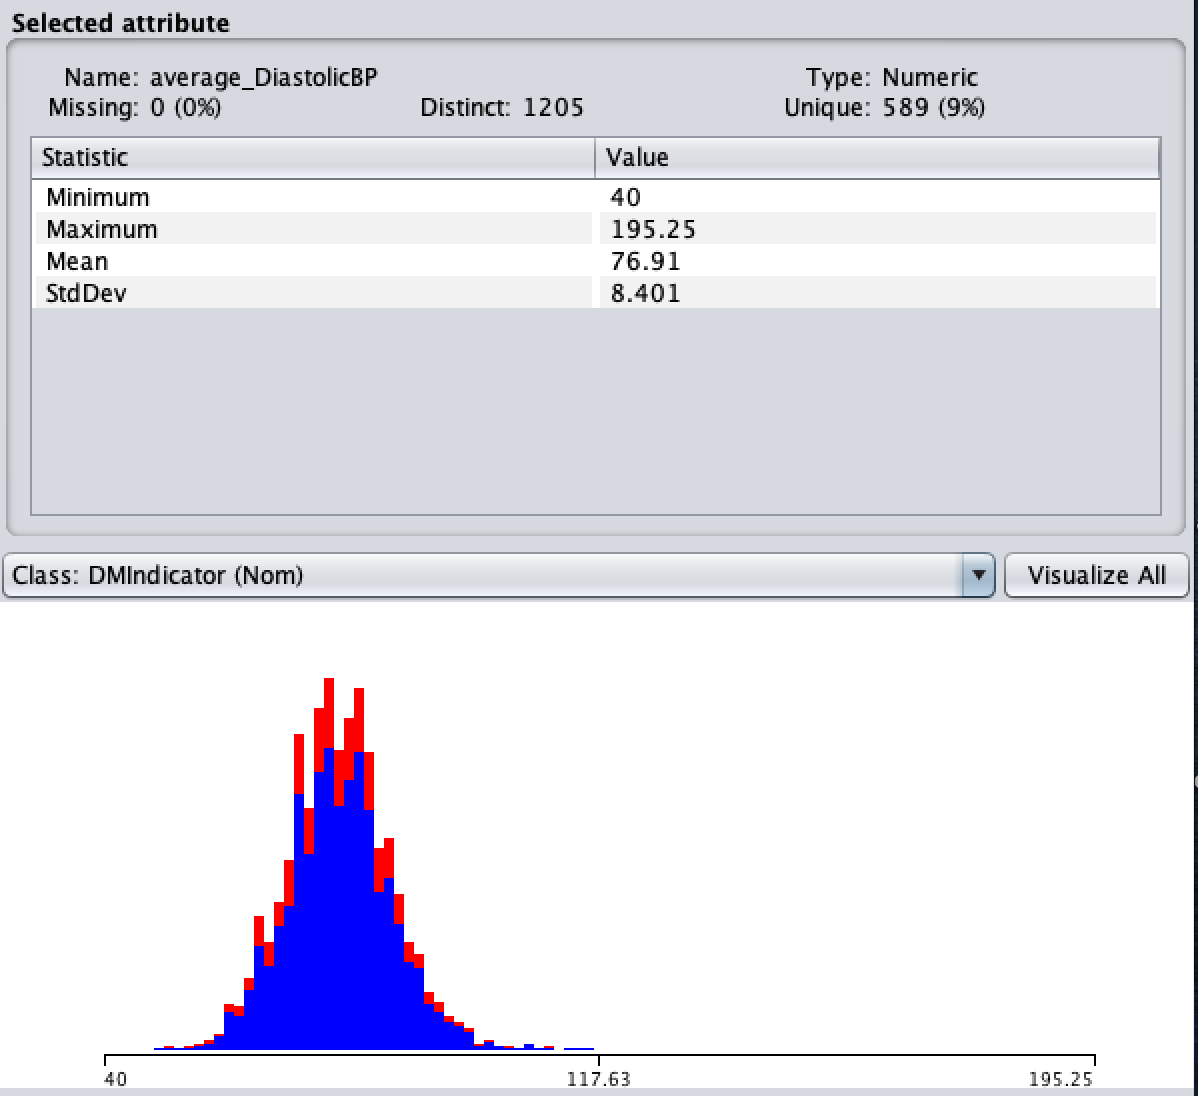

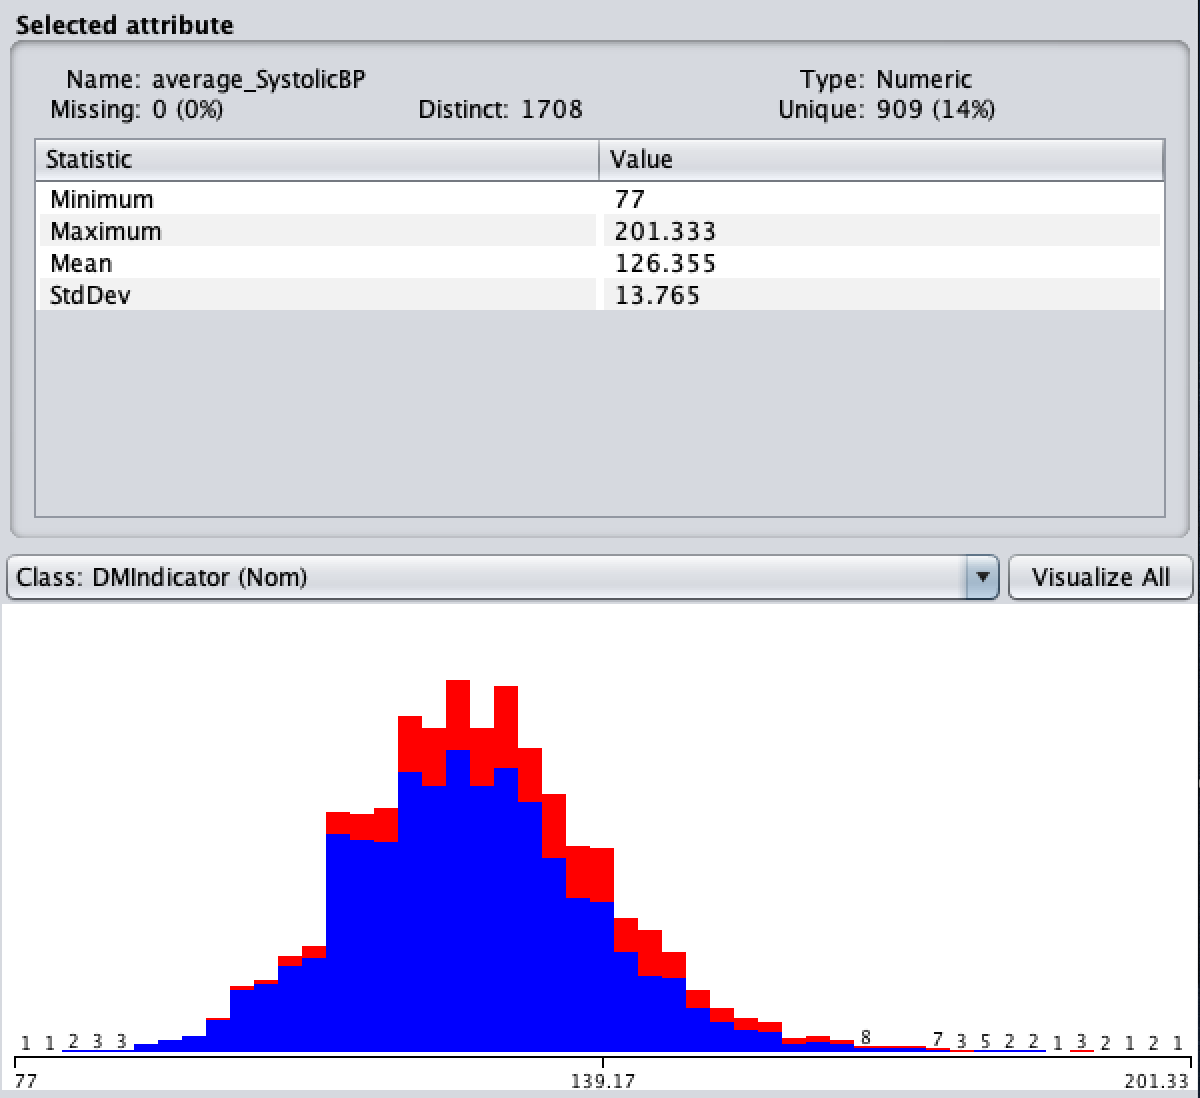

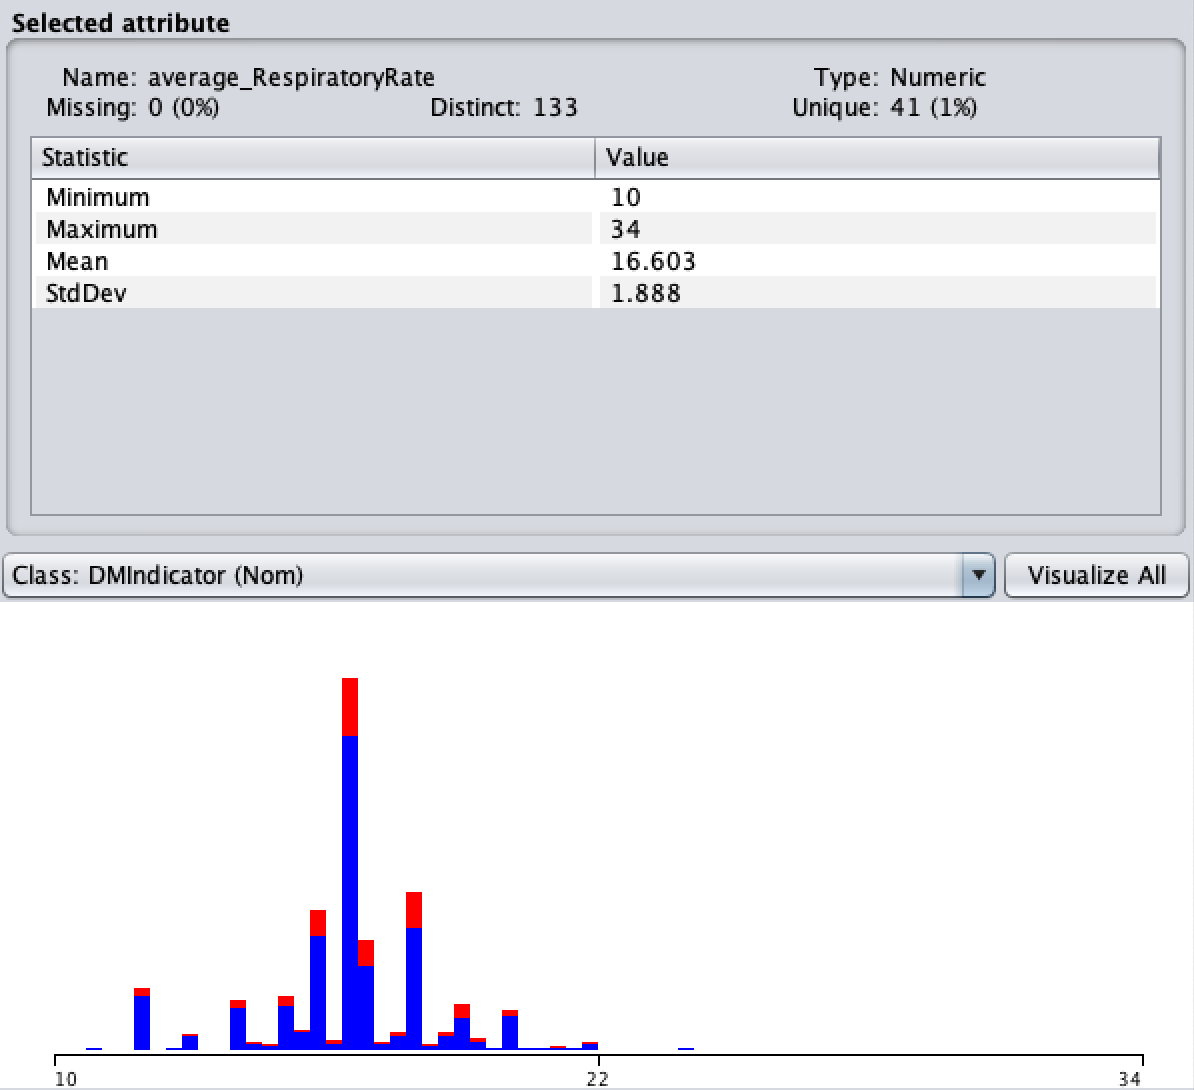

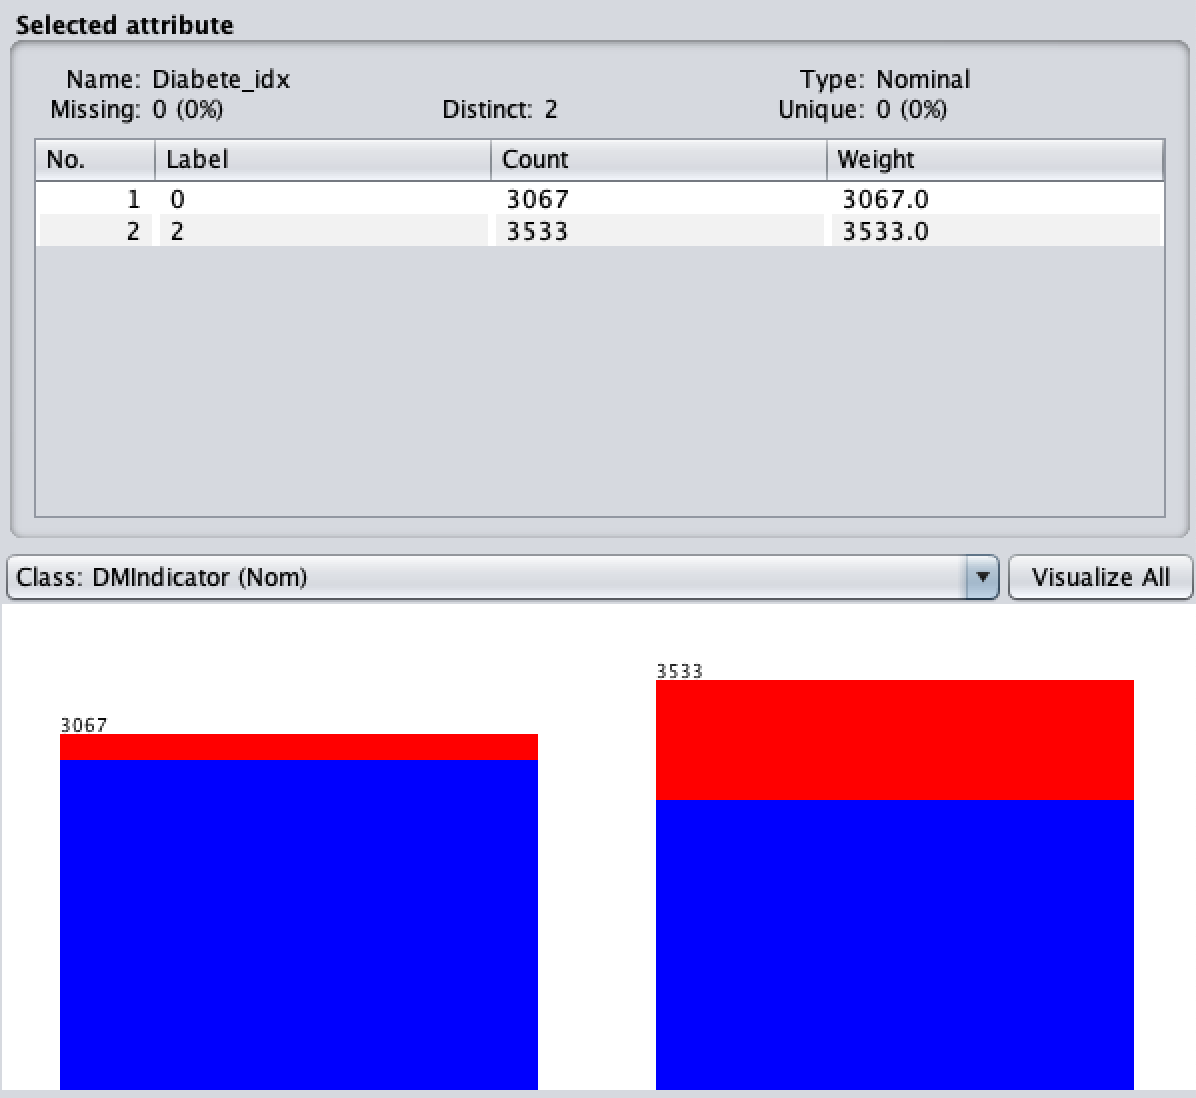

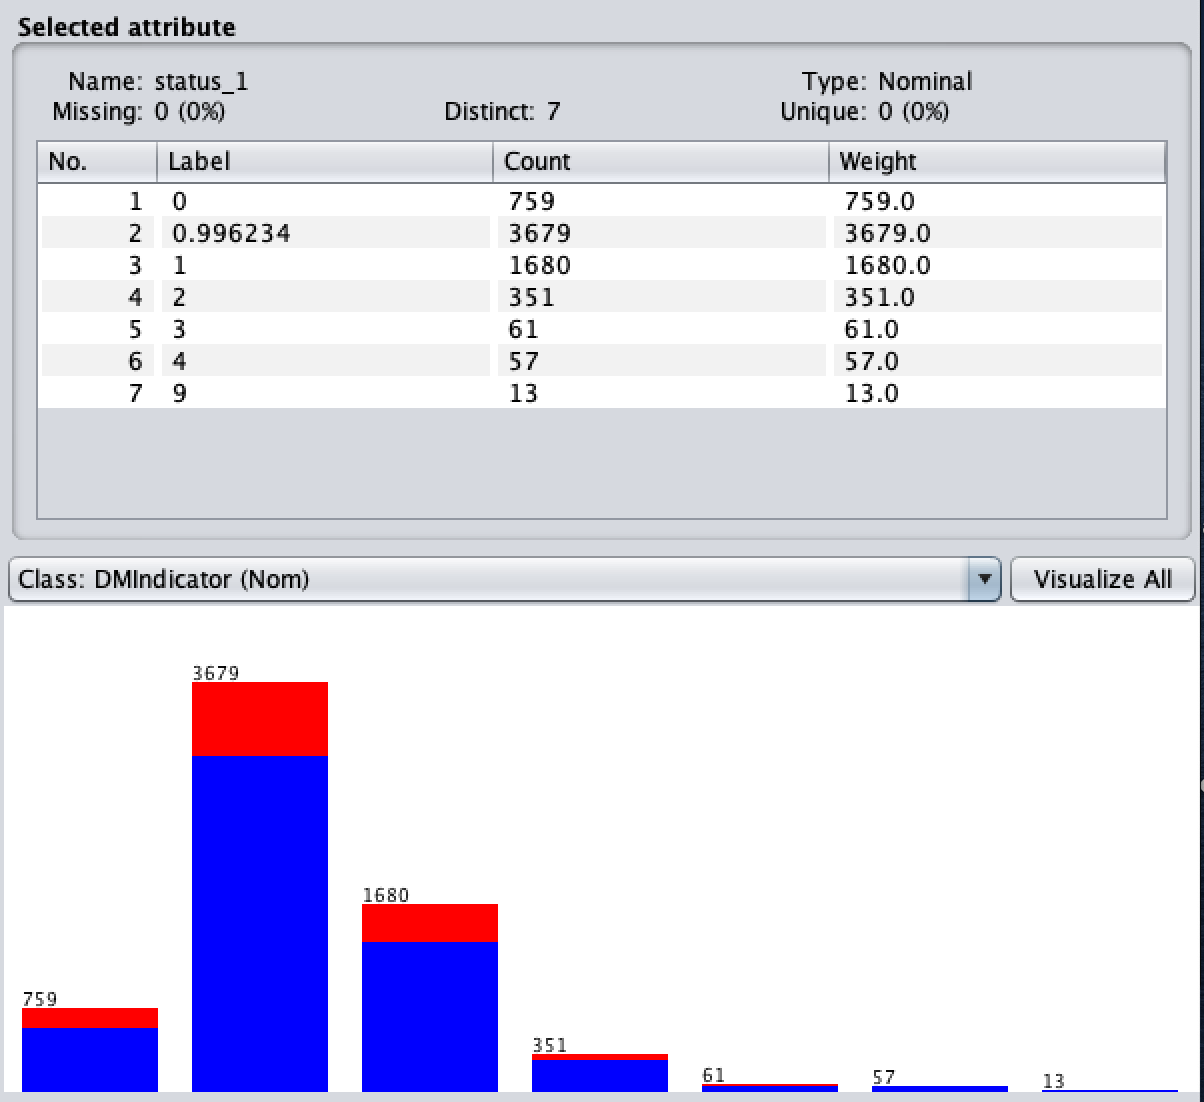

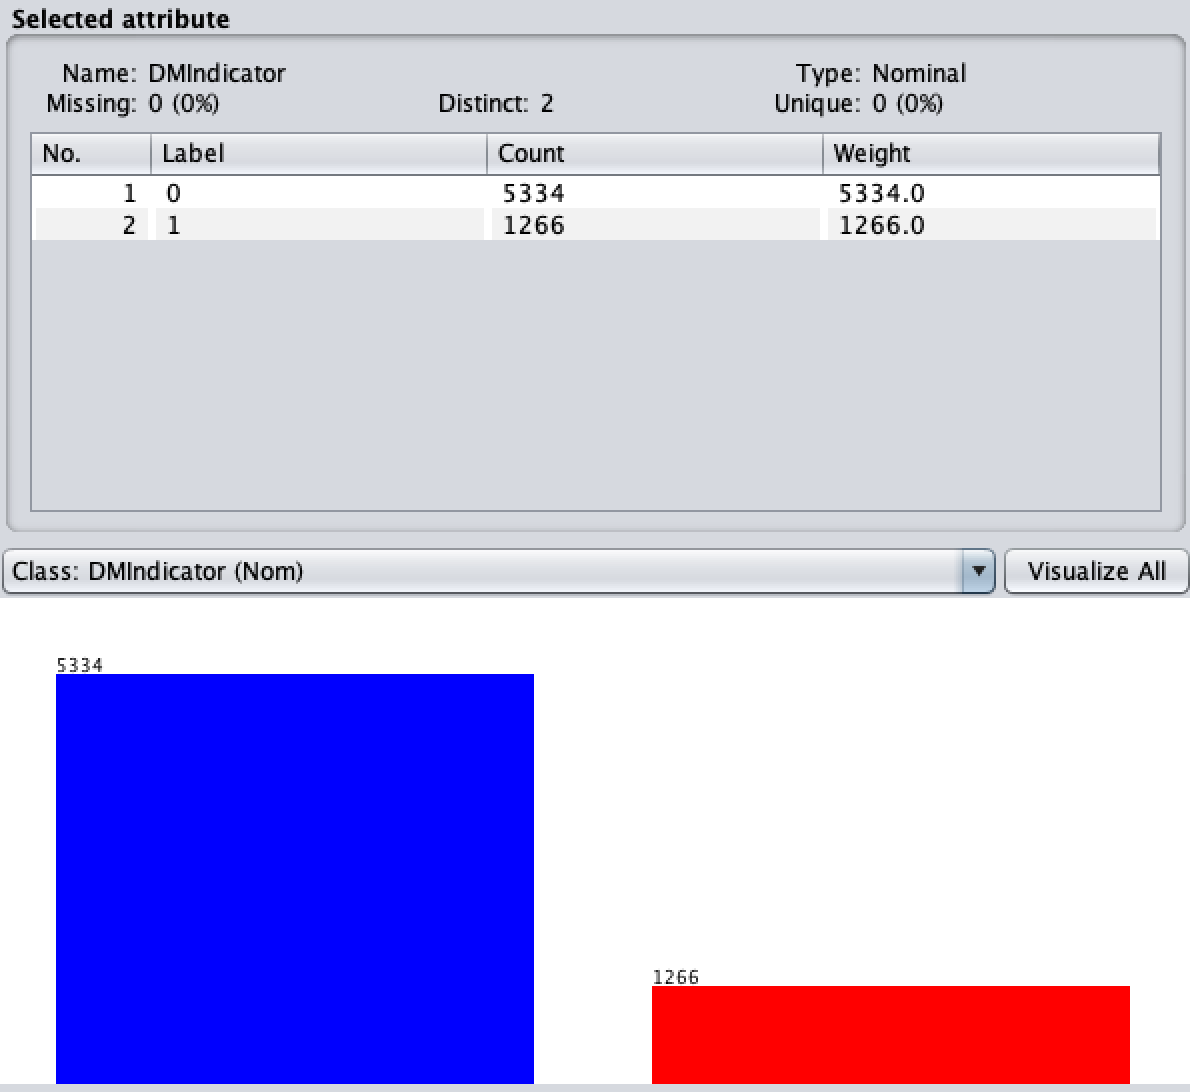

In [919]:
display(Age_img, Gender_img, BMI_img, Weight_img, Height_img, DiastolicBP_img, SystolicBP_img, RespiratoryRate_img, DiabeteRisk_img,SmokingStatus_img, DMIndicator_img )

# Split Training & Test Data 

In [143]:
training_data = data.dropna(subset=['DMIndicator'])
# 6600
training_data.shape

(6600, 26)

In [144]:
test_data = data[data.DMIndicator.isnull()]
# 3348
test_data.shape
test_data.head()

,average_BMI,average_SystolicBP,average_DiastolicBP,average_RespiratoryRate,average_height,average_weight,Gender_F,Gender_M,Age_Group_11-20,Age_Group_21-30,...,status_1_0.0,status_1_1.0,status_1_1.0099390106166704,status_1_2.0,status_1_3.0,status_1_4.0,status_1_9.0,Diabete_idx_0.0,Diabete_idx_2.0,DMIndicator
6600,35.05975,114.166667,81.100000,19.000000,61.5,189.285714,1,0,0,0,...,1,0,0,0,0,0,0,1,0,NaN
6601,30.30000,136.666667,72.857143,16.622982,65.0,181.920000,1,0,0,0,...,0,0,1,0,0,0,0,1,0,NaN
6602,26.93600,150.250000,74.250000,19.000000,67.0,172.000000,0,1,0,0,...,0,0,1,0,0,0,0,0,1,NaN
6603,37.50500,161.000000,104.000000,16.000000,69.0,257.000000,0,1,0,0,...,0,0,1,0,0,0,0,0,1,NaN
6604,26.95240,136.000000,85.750000,18.000000,61.5,143.600000,1,0,0,0,...,0,1,0,0,0,0,0,1,0,NaN


# Build models and Predict

In [145]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, model_selection, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.metrics import brier_score_loss
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [149]:
cols = list(training_data.columns.values) 
cols.pop(cols.index('DMIndicator')) 
X = training_data[cols] 
y = training_data["DMIndicator"]
X.head()

,average_BMI,average_SystolicBP,average_DiastolicBP,average_RespiratoryRate,average_height,average_weight,Gender_F,Gender_M,Age_Group_11-20,Age_Group_21-30,...,Age_Group_81-90,status_1_0.0,status_1_1.0,status_1_1.0099390106166704,status_1_2.0,status_1_3.0,status_1_4.0,status_1_9.0,Diabete_idx_0.0,Diabete_idx_2.0
0,19.121500,132.333333,72.714286,16.622982,69.0,133.400000,0,1,0,0,...,1,0,0,1,0,0,0,0,0,1
1,26.389000,108.333333,67.000000,16.622982,66.5,164.293714,1,0,0,1,...,0,0,1,0,0,0,0,0,1,0
2,38.041000,122.666667,88.000000,16.622982,59.0,194.666667,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
3,32.885300,125.000000,82.500000,15.333333,72.0,242.500000,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
4,32.810615,114.500000,76.500000,19.000000,62.0,178.814286,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0


In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [153]:
# Logistic Regression 
lr = LogisticRegression(random_state=0).fit(X_train, y_train)

#y_val_pred = lr.predict(X_test)
y_val_pred = lr.predict_proba(X_test)
print(y_val_pred[:10])
y_val_pred.shape

[[0.55265288 0.44734712]
 [0.65474795 0.34525205]
 [0.88040874 0.11959126]
 [0.36620552 0.63379448]
 [0.93509221 0.06490779]
 [0.77276979 0.22723021]
 [0.81123664 0.18876336]
 [0.974561   0.025439  ]
 [0.80835361 0.19164639]
 [0.95102981 0.04897019]]


(2178, 2)

In [154]:
answer = y_val_pred[:,1]
answer

array([0.44734712, 0.34525205, 0.11959126, ..., 0.09157345, 0.02164391,
       0.26346749])

In [155]:
brier_score_loss(y_test, answer)

0.12241395931369246

In [49]:
#accuracy_score(y_test, y_val_pred)

0.800734618916437

In [46]:
# RandomForest: 0.1280190
rf = RandomForestClassifier(n_estimators=1000).fit(X_train, y_train)
y_val_pred = rf.predict(X_test)

In [48]:
# KNN: 0.15987144
knn = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
y_val_pred = knn.predict(X_test)

# Fit to get the final answer 

In [156]:
# use all the training data to predict 
lr2 = LogisticRegression(random_state=42).fit(X, y)

In [159]:
cols = list(test_data.columns.values) 
cols.pop(cols.index('DMIndicator')) 
test = test_data[cols] 
ans = lr2.predict_proba(test)
print(ans[:10])
ans.shape

[[0.96391956 0.03608044]
 [0.8317719  0.1682281 ]
 [0.40464055 0.59535945]
 [0.66386385 0.33613615]
 [0.97372861 0.02627139]
 [0.84910933 0.15089067]
 [0.60975939 0.39024061]
 [0.5363325  0.4636675 ]
 [0.93992896 0.06007104]
 [0.87362387 0.12637613]]


(3348, 2)

In [160]:
output = ans[:,1]
output

array([0.03608044, 0.1682281 , 0.59535945, ..., 0.10347374, 0.30423923,
       0.33320297])

In [161]:
test["DMIndicatorForecast"] = output

final = test_patientID.join(test) 
final = final[['PatientGuid','DMIndicatorForecast']]
final.to_csv('final_predictions.csv', index=False)

In [163]:
final.head()
f = final[final['DMIndicatorForecast'] >= 0.5]
f

,PatientGuid,DMIndicatorForecast
6602,1F4D1486-7632-4576-AC92-A760680D1DC9,0.595359
6612,85847F3A-6372-4069-90F7-A7B3D5EED239,0.518434
6632,2498974A-D750-4490-A289-A82C97AFC994,0.594394
6639,5208483A-0A5B-43DE-A8AA-A868525DAE6D,0.651977
6664,F3491622-E1C1-4914-8AA1-A8D1270E4579,0.535812
...,...,...
9861,6032C766-64DC-41C8-A57F-FDCF78611214,0.581861
9891,6BA92837-D7A2-458A-8010-FEA6FB12B5B6,0.628715
9907,00DFEA15-6AE7-4FF3-A7D0-FEF911632377,0.518247
9914,3B00A68F-C3A3-4D43-AE71-FF272DA656AD,0.581328
